In [70]:
#mengimport library/package yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [2]:
#load dataset train dan test
data_train = pd.read_csv('C:\\Users\\Maulana Yusri Miladi\\Documents\\Python Scripts\\train.csv')
data_test = pd.read_csv('C:\\Users\\Maulana Yusri Miladi\\Documents\\Python Scripts\\test.csv')

In [3]:
print('Data train memiliki '+ str(len(data_train)) + ' baris dan memiliki '+ str(len(data_train.columns)) + ' kolom')
print('Data test memiliki '+ str(len(data_test)) + ' baris dan memiliki '+ str(len(data_test.columns)) + ' kolom')

Data train memiliki 891 baris dan memiliki 12 kolom
Data test memiliki 418 baris dan memiliki 11 kolom


In [4]:
print('3 kolom teratas dari data train :')
display(data_train.head(3))
print('3 kolom teratas dari data test :')
display(data_test.head(3))

3 kolom teratas dari data train :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


3 kolom teratas dari data test :


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


Pada kedua dataset diatas terlihat bahwa terdapat perbedaan 1 kolom yaitu kolom Survived yang mana kolom tersebut adalah kolom yang akan menjadi target prediksi kita. Dan pada kedua dataset diatas terdapat kolom yang memiliki nilai NULL/NaN. Oleh karena itu, perlu kita cek berapa banyak nilai NULL/NaN yang dimiliki oleh kedua dataset.

In [5]:
print('Missing data pada data train :',data_train.isnull().sum())
print('Missing data pada data test :',data_test.isnull().sum())

Missing data pada data train : PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing data pada data test : PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Pada train data memiliki nilai NULL/NaN pada kolom Age, Cavin dan Embarked, Sedangkan pada test data nilai NULL/NaN terdapat pada kolom Age, Fare dan Cabin.

In [6]:
#membuat fungsi untuk menggabungkan kedua dataset
def concat_df(data_train, data_test):
    return pd.concat([data_train, data_test], sort = True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [7]:
df_data = concat_df(data_train, data_test)

Exploratory Data Analysis

Exploratory Data Analysis adalah suatu proses dimana kita mengekstrak insight dari dataset, proses investigasi awal pada data untuk menemukan pola, untuk menemukan anomali dan untuk menguji hipotesis.

In [8]:
#Memeriksa nilai NULL/NaN pada kolom Age
print('Nilai NULL/NaN pada Kolom Age : ' + str(df_data['Age'].isnull().sum()))
print('Persentase nilai NULL/NaN : ' + str(round(df_data['Age'].isnull().sum()/len(df_data)*100,0)) + ' %')

Nilai NULL/NaN pada Kolom Age : 263
Persentase nilai NULL/NaN : 20.0 %


Sebesar 20% dari kolom Age adalah nilai NULL/NaN. Maka kita akan memeriksa distribusi pada kolom Age

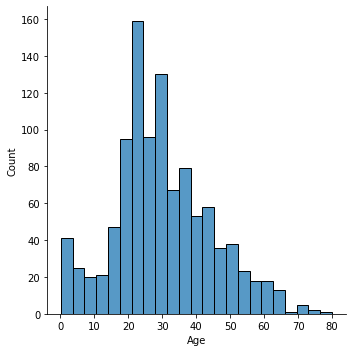

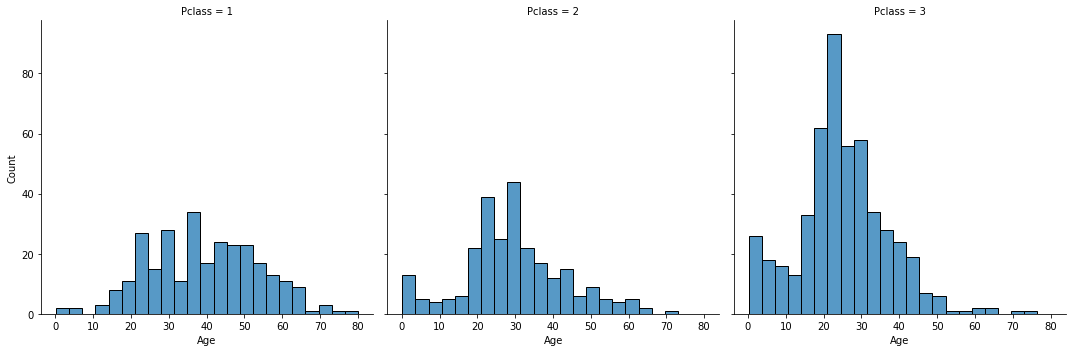

In [9]:
#Memeriksa distribusi pada kolom Age
sns.displot(df_data, x = 'Age')
sns.displot(df_data, x = 'Age', col = 'Pclass', multiple = 'dodge')

In [10]:
print('Median Age berdasarkan kolom PClass :')
display(data_train.groupby('Pclass')['Age'].median())
print('Median Age berdasarkan kolom PClass dan colom Sex :')
display(data_train.groupby(['Pclass','Sex'])['Age'].median())
print('Total Kasus:')
display(data_train.groupby(['Pclass','Sex'])['Age'].count())

Median Age berdasarkan kolom PClass :


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median Age berdasarkan kolom PClass dan colom Sex :


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Total Kasus:


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

Kita akan mengganti nilai NULL/NaN pada kolom Age dengan Median daripada harus menghapus semua baris yang bernilai NULL/NaN. Karena seperti yang terlihat pada grafik histogram yang memiliki kecenderungan miring ke kanan. 

In [11]:
#mengubah nilai NULL/NaN pada kolom Age dengan median
df_data['Age'] = df_data.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [12]:
#Memeriksa nilai NULL/NaN pada kolom Fare
df_data.loc[df_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


Pada kolom Fare kita hanya menemukan 1 data yang bernilai NULL/NaN. Mr. Thomas adalah penumpang kelas 3, berangkat sendiri dan berangkat dari Southhampton. Kita akan mencari data yang serupa dengan Mr. Thomas untuk mengisi nilai NULL/NaN pada kolom Fare.

In [13]:
mr_thomas = df_data.loc[(df_data['Pclass'] == 3) & (df_data['SibSp'] == 0) & (df_data['Embarked'] == 'S')]['Fare'].median()
print(mr_thomas)
df_data.loc[df_data['Fare'].isnull(), 'Fare'] = mr_thomas

7.925


In [14]:
#memeriksa kolom Cabin
display(data_train['Cabin'].unique())
print('Terdapat ' + str(data_train['Cabin'].nunique()) + ' Cabin yang berbeda dan ' + str(data_train['Cabin'].isnull().sum()) + ' nilai NULL/NaN.')

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Terdapat 147 Cabin yang berbeda dan 687 nilai NULL/NaN.


Ada banyak nilai yang hilang tetapi kita harus menggunakan variabel Cabin karena dapat menjadi prediktor penting. Seperti yang Anda lihat pada gambar berikut, kelas pertama memiliki Cabin di dek A, B atau C, campurannya ada di D atau E dan kelas ketiga terutama di f atau g. Kita dapat mengidentifikasi dek dengan huruf pertama.

In [15]:
#Mengelompokan Cabin berdasarkan huruf awal dan untuk data yang bernilai NULL/NaN akan dikelompokan kedalam M
df_data['Deck'] = df_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_all_deck = df_data.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

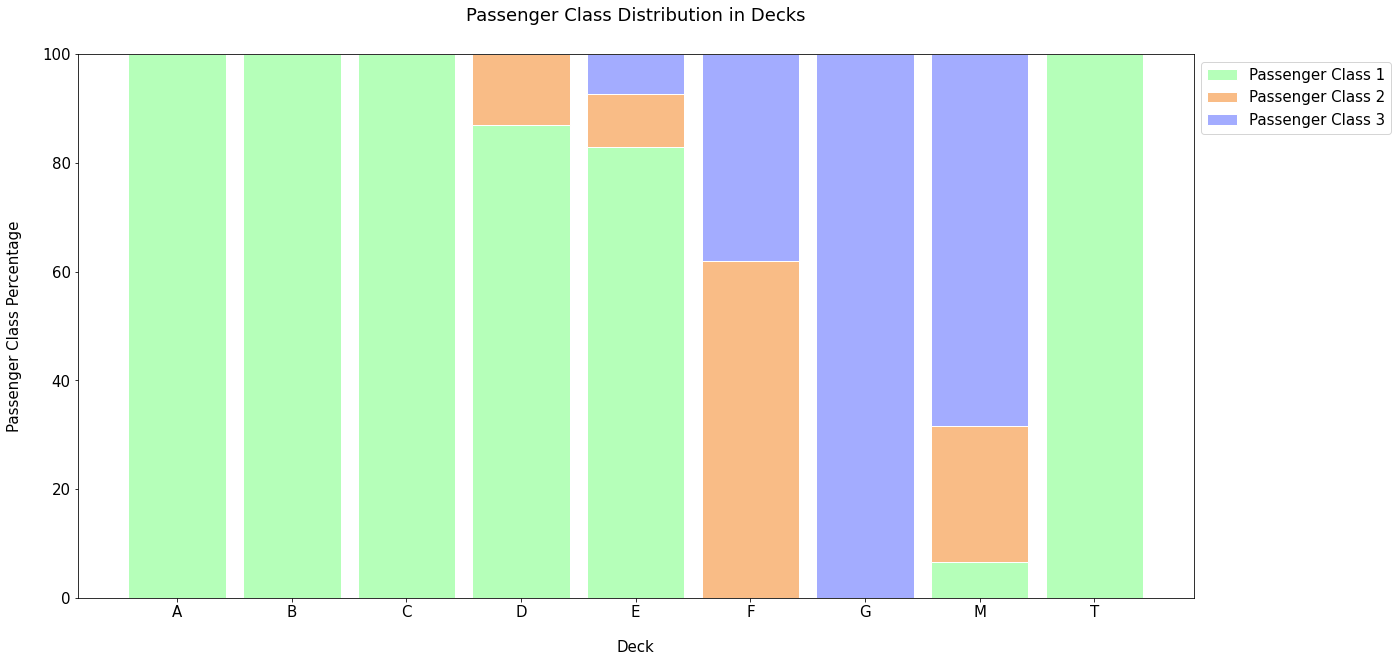

In [16]:
#fungsi untuk membuat bar plot Deck berdasarkan Pclass penumpang
def get_pclass_dist(df):
    
    # Pivot for each deck by class
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_deck)
display_pclass_dist(all_deck_per)

Text(0.5, 0.98, 'Survival rates for different cabines')

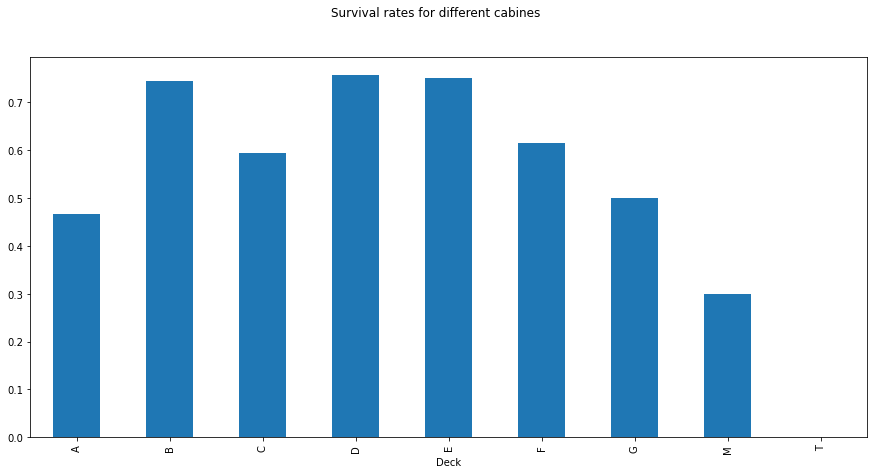

In [17]:
df_data[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.suptitle('Survival rates for different cabines')

In [18]:
idx = df_data[df_data['Deck']=='T'].index
df_data.loc[idx, 'Deck'] = 'A'
df_data['Deck'] = df_data['Deck'].replace(['A','B','C'], 'ABC')
df_data['Deck'] = df_data['Deck'].replace(['D','E'], 'DE')
df_data['Deck'] = df_data['Deck'].replace(['F','G'], 'FG')

df_data['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [19]:
#memeriksa nilai NULL/NaN pada kolom Embarked
df_data.loc[df_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,ABC
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,ABC


Mengganti nilai NULL/NaN pada kolom Embarked dengan mencari data yang mirip Fare, Deck dan Class variabel bisa dijadikan sebagai acuan untuk mencari mengganti nilai NULL/NaN.

In [20]:
df_data.loc[(df_data['Pclass'] == 1) & (df_data['Fare']<= 80) & (df_data['Deck'] =='ABC')]['Embarked'].value_counts()

S    50
C    42
Name: Embarked, dtype: int64

In [21]:
df_data.loc[df_data['Embarked'].isnull(), 'Embarked'] = 'S'

Kesimpulan

Kita telah mengisi setiap nilai yang hilang dalam dataset dan tidak ada kolom yang dihapus. Kita juga menggunakan metode statistik untuk Age dan Fare, membuat kategori baru untuk Cabin dan melakukan beberapa penelitian untuk orang hilang pada Embarked. Mari kita periksa apakah semuanya baik-baik saja sekarang.

In [22]:
print('Data yang bernilai NULL/NaN :')
display(df_data.isnull().sum())

Data yang bernilai NULL/NaN :


Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

Feature Engineering

Feature Engineering adalah seni dan salah satu hal paling menarik di bidang Machine Learning. Kumpulan data titanic menawarkan banyak kemungkinan untuk mencoba berbagai metode dan meningkatkan skor prediksi.
Teknik yang akan gunakan sejauh ini:
- Binning variabel kontinu (misalnya Usia)
- Buat fitur baru dari variabel yang ada (mis. Title)
- Label encoding untuk fitur non numerik (misalnya Sex)
- One Hot Encoding untuk fitur kategori (misalnya Pclass)

<AxesSubplot:>

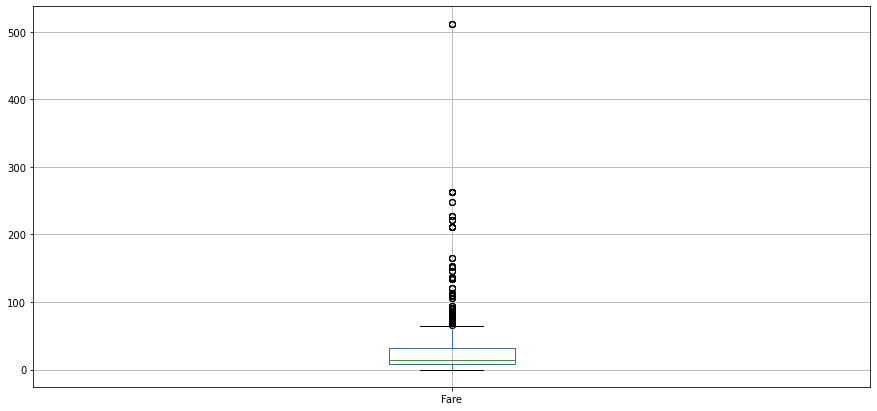

In [25]:
df_data.boxplot(column=['Fare'], figsize=(15,7))

<AxesSubplot:>

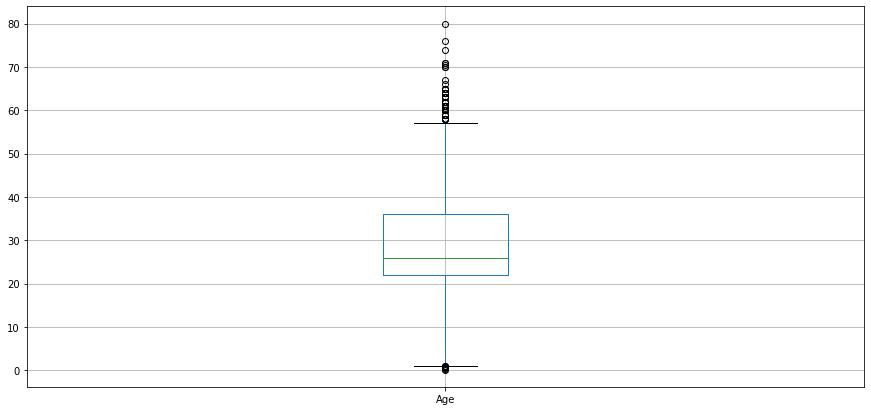

In [26]:
df_data.boxplot(column=['Age'], figsize=(15,7))

Seperti yang terlihat pada boxplot di atas, terdapat banyak sekali outliers dari kedua variabel Age dan Fare. Kita akan mengelompokan menjadi beberapa distribusi sehingga outliers tidak akan mengganggu algoritma kita. Variabel Fare akan menetapkan jumlah kasus yang sama untuk setiap kategori. Untuk variabel Age kita akan membuat kategori berdasarkan nilai variabel.
- Cut digunakan untuk membentuk bins berdasarkan variabel, terlepas berapa banyak kasus yang termasuk dalam kategori
- Qcut digunakan untuk menguraikan distribusi sehingga ada jumlah kasus yang sama disetiap kategori

In [27]:
df_data['Fare'] = pd.qcut(df_data['Fare'], 5)
df_data['Age'] = pd.qcut(df_data['Age'].astype(int), 5)

In [28]:
print('Untuk variabel Age pada setiap kategori memiliki kasus :')
df_data['Age'].value_counts()

Untuk variabel Age pada setiap kategori memiliki kasus :


(21.0, 25.0]      361
(-0.001, 21.0]    290
(29.0, 40.0]      264
(40.0, 80.0]      252
(25.0, 29.0]      142
Name: Age, dtype: int64

In [29]:
print('Untuk variabel Fare pada setiap kategori memiliki kasus :')
df_data['Fare'].value_counts()

Untuk variabel Fare pada setiap kategori memiliki kasus :


(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(10.5, 21.558]       255
(7.854, 10.5]        255
Name: Fare, dtype: int64

In [30]:
df_data[['Age','Survived']].groupby('Age')['Survived'].mean()

Age
(-0.001, 21.0]    0.426471
(21.0, 25.0]      0.304721
(25.0, 29.0]      0.382979
(29.0, 40.0]      0.460733
(40.0, 80.0]      0.355030
Name: Survived, dtype: float64

In [31]:
df_data[['Fare','Survived']].groupby('Fare')['Survived'].mean()

Fare
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.558]       0.426901
(21.558, 41.579]     0.443243
(41.579, 512.329]    0.645349
Name: Survived, dtype: float64

Rata-rata penumpang berusia muda memiliki peluang selamat lebih besar begitupula dengan penumpang dengan yang membeli tiket dengan harga mahal.

Text(0.5, 0.98, 'Survival rate untuk kategori Age')

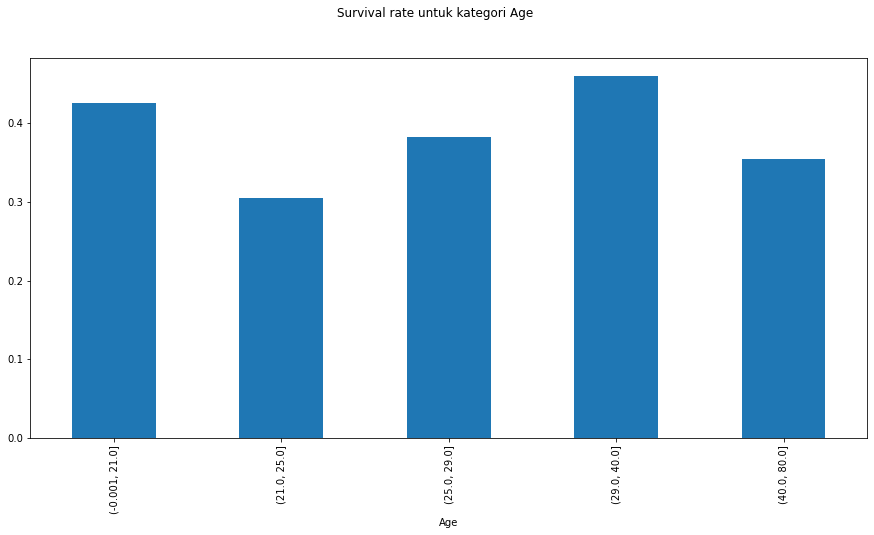

In [32]:
df_data[['Age','Survived']].groupby('Age')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.suptitle('Survival rate untuk kategori Age')

Text(0.5, 0.98, 'Survival rate untuk kategori Fare')

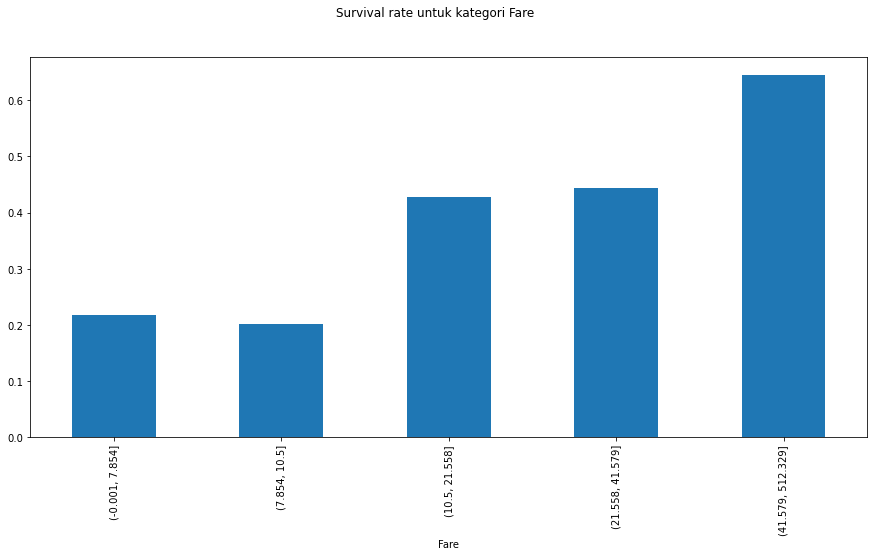

In [34]:
df_data[['Fare','Survived']].groupby('Fare')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.suptitle('Survival rate untuk kategori Fare')

Membuat Feature baru dari variabel yang tersedia

Family Size
Terdapat 2 variabel yang menarik perhatian pada dataset kita yang memuat informasi tentang Family Size. SibSp menginformasikan berapa banyak Saudara kandung dan Pasangan yang dimiliki dan Parch adalah variabel yang informasikan berapa banyak orang tua dan anak-anak. Kita dapat men-summarize variabel-variabel ini dan menambahkan 1 variabel untuk mendapatkan Family Size

<AxesSubplot:>

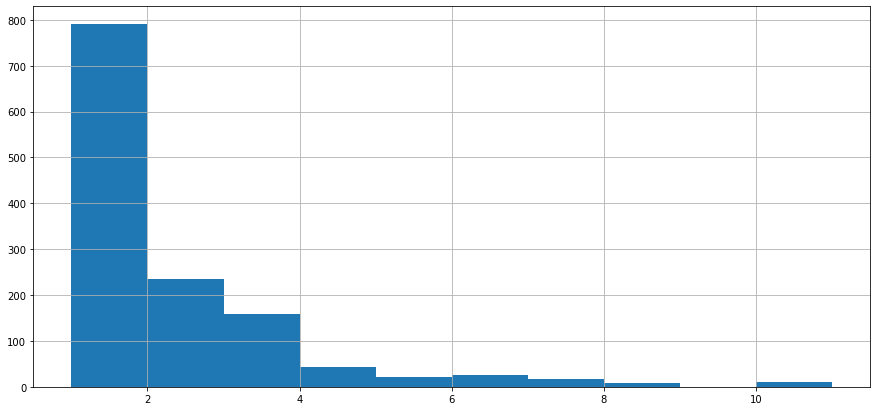

In [36]:
df_data['Family Size'] = df_data['SibSp'] + df_data['Parch'] + 1
df_data['Family Size'].hist(figsize=(15,7))

In [37]:
df_data['Family Size bin'] = df_data['Family Size'].map(lambda s: 1 if s == 1 else (2 if s == 2 else (3 if 3 <= s <= 4 else (4 if s >= 5 else 0))))
df_data['Family Size bin'].value_counts()

1    790
2    235
3    202
4     82
Name: Family Size bin, dtype: int64

Salahsatu hipotesa adalah keluarga memiliki peluang lebih tinggi untuk Survived daripada Single karena mereka saling membantu satu dengan yang lainnya. Namun, jika keluarga terlalu besar kemungkinan koordinasipun akan sangat sulit terlebih dalam situasi yang luar biasa panik

Text(0.5, 0.98, 'Survival rates kategori Family Size')

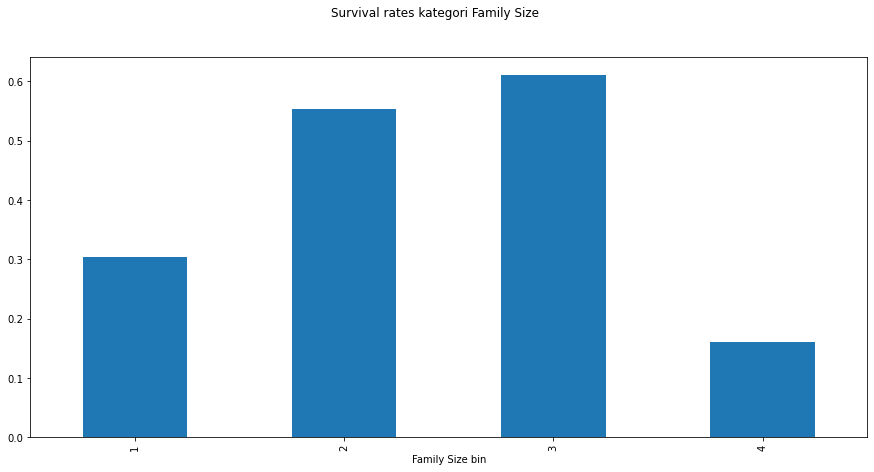

In [40]:
df_data[['Family Size bin','Survived']].groupby('Family Size bin')['Survived'].mean().plot(kind='bar',figsize=(15,7))
plt.suptitle('Survival rates kategori Family Size')

Terdapat korelasi antara Ticket Frequencies dan Survival Rates, karena nomer Ticket merupakan petunjuk bahwa penumpang tidak pergi sendirian

In [42]:
df_data['Ticket Frequency'] = df_data.groupby('Ticket')['Ticket'].transform('count')
df_data[['Ticket Frequency','Survived']].groupby('Ticket Frequency').mean()

,Survived
Ticket Frequency,
1,0.270270
2,0.513812
3,0.653465
4,0.727273
5,0.333333
6,0.210526
7,0.208333
8,0.384615
11,0.000000


Seperti yang kita harapkan bahwa terdapat perbedaan antara Survival Rates untuk setiap Ticket Frequencies

Title
Variabel Name menyediakan informasi yang sangat penting tentang status Sosio ekonomi penumpang

In [44]:
df_data['Title'] = df_data['Name'].str.split(', ',expand=True)[1].str.split('.', expand=True)[0]
df_data['Is Married'] = 0
df_data['Is Married'].loc[df_data['Title'] == 'Mrs'] = 1
df_data['Title'].nunique()

C:\Users\Maulana Yusri Miladi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


18

In [45]:
title_names = (df_data['Title'].value_counts() < 10)
df_data['Title'] = df_data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
df_data.groupby('Title')['Title'].count()

Title
Master     61
Misc       34
Miss      260
Mr        757
Mrs       197
Name: Title, dtype: int64

Terdapat banyak sekali Title penumpang yang berbeda pada dataset kita. Jadi, kita hanya akan memilih 10 Title dan untuk Title yang lain kita akan namai dengan MISC

# Survival Rates

In [46]:
import string

def extract_surname(data):
    families = []
    for i in range(len(data)):
        name = data.iloc[i]
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        for c in string.punctuation:
            family = family.replace(c, '').strip()
        families.append(family)
    return families
df_data['Family'] = extract_surname(df_data['Name'])

In [47]:
df_data['Family'].nunique()

875

Penumpang dengan gelar Master dan Perempuan memiliki peluang Survived yang lebih sering dan rata-rata memiliki anggota keluarga yang banyak.

In [49]:
df_data[['Title','Survived','Family Size']].groupby('Title').mean()

,Survived,Family Size
Title,,
Master,0.575000,4.426230
Misc,0.444444,1.441176
Miss,0.697802,2.169231
Mr,0.156673,1.442536
Mrs,0.792000,2.492386


Survival rates dikelompokan berdasarkan anggota keluarga wanita :


<AxesSubplot:>

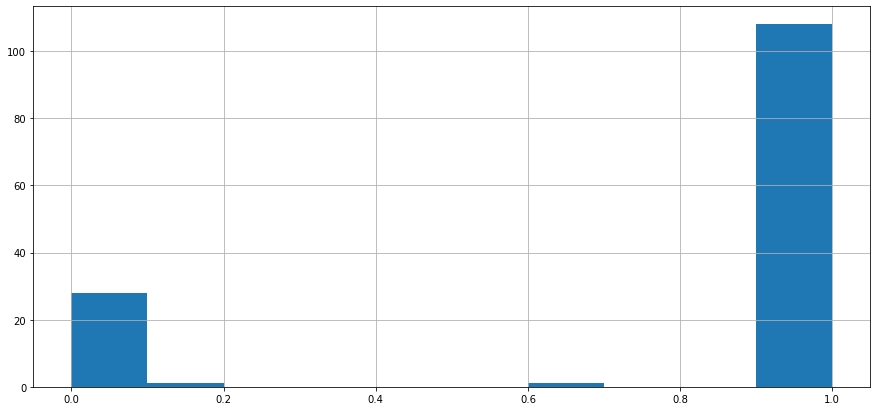

In [50]:
print('Survival rates dikelompokan berdasarkan anggota keluarga wanita :')
df_data.loc[(df_data['Sex'] =='female') & (df_data['Family Size'] > 1)].groupby('Family')['Survived'].mean().hist(figsize=(15,7))

Pada wanita dengan Family Size 2 atau lebih, paling sering semua atau tidak ada dari mereka yang mati.

<AxesSubplot:>

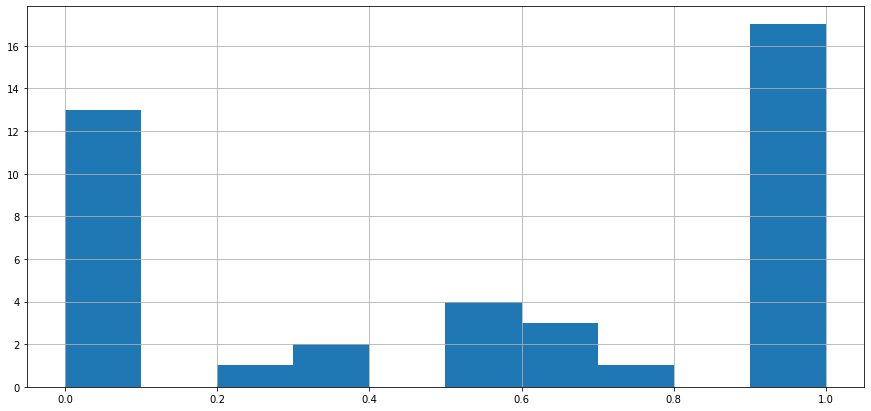

In [51]:
master_families = df_data.loc[df_data['Title'] == 'Master']['Family'].tolist()
df_data.loc[df_data['Family'].isin(master_families)].groupby('Family')['Survived'].mean().hist(figsize=(15,7))

Hal yang sama berlaku untuk keluarga penumpang yang memiliki gelar Master.

In [55]:
#membuat variabel dengan survival rates pada perempuan dan masters
women_rate = df_data.loc[(df_data['Sex'] == 'female') & (df_data['Family Size'] > 1)].groupby('Family')['Survived'].mean()
master_rate = df_data.loc[df_data['Family'].isin(master_families)].groupby('Family')['Survived'].mean()
#menggabungkan 2 series di atas
combined_rate = women_rate.append(master_rate)
#ada kemungkinan bahwa perempuan memiliki keluarga yang bergelas Master dan sebaliknya, maka dari itu kita perlu menghapus data yang duplikat tersebut
combined_rate_df = combined_rate.to_frame().reset_index().rename(columns={'Survived':'Survival Quota'}).drop_duplicates(subset='Family')
#gabungkan pada dataframe
df_data = pd.merge(df_data, combined_rate_df, how='left')

In [56]:
#kita akan menghitung survival rate
df_data['Survival Quota N/A'] = 1
df_data.loc[df_data['Survival Quota'].isnull(), 'Survival Quota N/A'] = 0
df_data['Survival Quota'] = df_data['Survival Quota'].fillna(0)

In [57]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 1309 non-null   category
 1   Cabin               295 non-null    object  
 2   Embarked            1309 non-null   object  
 3   Fare                1309 non-null   category
 4   Name                1309 non-null   object  
 5   Parch               1309 non-null   int64   
 6   PassengerId         1309 non-null   int64   
 7   Pclass              1309 non-null   int64   
 8   Sex                 1309 non-null   object  
 9   SibSp               1309 non-null   int64   
 10  Survived            891 non-null    float64 
 11  Ticket              1309 non-null   object  
 12  Deck                1309 non-null   object  
 13  Family Size         1309 non-null   int64   
 14  Family Size bin     1309 non-null   int64   
 15  Ticket Frequency    1309 non-null   in

# Label- and One Hot Encoding

Beberapa Algoritma tidak akan bekerja pada data string, jadi variabel harus dikodekan sebelum dilakukan pemodelan. Label Encoding berfungsi untuk memetakan nilai non-numerik ke numerik.

In [63]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Age', 'Fare', 'Deck']
for feature in non_numeric_features:
    df_data[feature] = LabelEncoder().fit_transform(df_data[feature])
    
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family Size bin', 'Age', 'Fare']
encoded_features = []

for feature in cat_features:
    encoded_feat = OneHotEncoder().fit_transform(df_data[feature].values.reshape(-1, 1)).toarray()
    n = df_data[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df_data.index
    encoded_features.append(encoded_df)
    
df_data = pd.concat([df_data, *encoded_features], axis=1)

In [64]:
df_train, df_test = divide_df(df_data)

# Modelling dan Prediction

Untuk algoritma pertama kita, kita pilih algoritma Random Forest Classifier. RFC adalah algoritma yang mudah untuk dipahami dan algoritma yang tepat untuk kasus Klasifikasi.

Ada beberapa kolom pada dataset yang tidak gunakan untuk modelling. Seperti contoh Embarked, kita sudah membuat kolom dummy jadi kita dapat menghapus original kolom Embarked. Kemudian kita split dataset menjadi 75% untuk training dan 25 untuk test. Kita latih algoritma dengan data training kemudian kita coba aplikasikan algoritma dengan data test.

In [73]:
#definisikan kolom mana saja yang akan kita hapus karena kita telah buat label baru 
drop_cols = ['Embarked', 'Family', 'Family Size', 'Survived', 'Family Size bin', 'Deck', 'Age', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Title', 'Ticket', 'Cabin']
drop_cols_2 = ['Embarked', 'Family', 'Family Size', 'Family Size bin', 'Deck','Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Title', 'Ticket', 'Cabin']

In [75]:
#setting up RFC
#standardization variabel
X = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols_2))
#creating train, test splits
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.25, random_state=42)
#defining model parameters
model = RandomForestClassifier(criterion='gini',
                              n_estimators=1750,
                              max_depth=7,
                              min_samples_split=6,
                              min_samples_leaf=6,
                              max_features='auto',
                              oob_score=True,
                              random_state=42,
                              n_jobs=-1,
                              verbose=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(model.score(X_test1, y_test1))
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived':predictions})
output['Survived'] = output['Survived'].astype(int)
output.to_csv('2021-06-21_submission.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    5.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

0.874439461883408


[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.6s finished


# Original Code and Reference

- https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280
- https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial